<a href="https://colab.research.google.com/github/ishika1801/lab/blob/main/ishika_demo_miniprj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stat
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from xgboost import XGBClassifier

In [ ]:
df_train = pd.read_csv('covid_mental_health_train.csv')
df=df_train

#Missing Value Check for train data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
print(missing_data.head())

df_drop = df_train.dropna()

                   Total    Percent
income_group        1328  15.423926
id                     0   0.000000
healthy_sleep          0   0.000000
difficulty_work        0   0.000000
difficulty_living      0   0.000000


**Spearman Rank Correaltion identification**

['id', 'city', 'gender', 'age', 'job', 'health_worker_self', 'health_worker_family', 'family_status', 'income_group', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
Spearman correlation: 0.022 pvalu 0.03751752794 id
Spearman correlation: 0.015 pvalu 0.15646045829 city
Spearman correlation: 0.042 pvalu 0.00010907887 gender
Spearman correlation: -0.135 pvalu 0.00000000000 age
Spearman correlation: -0.011 pvalu 0.31035703205 job
Spearman correlation: -0.017 pvalu 0.11665885329 health_worker_self
Spearman correlation: -0.012 pvalu 0.25791019318 health_worker_family
Spearman correlation: -0.116 pvalu 0.00000000000 family_status
Spearman correlation: nan pvalu nan income_group
Spearman correlat

(array([2., 1., 4., 2., 8., 3., 0., 3., 1., 3.]),
 array([-2.40952960e-01, -1.92723839e-01, -1.44494718e-01, -9.62655967e-02,
        -4.80364756e-02,  1.92645467e-04,  4.84217665e-02,  9.66508876e-02,
         1.44880009e-01,  1.93109130e-01,  2.41338251e-01]),
 <a list of 10 Patch objects>)

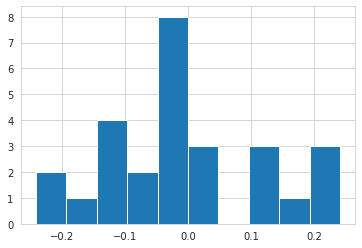

In [ ]:
from scipy.stats import spearmanr
in_vars=list(df.keys())
in_vars.pop(len(in_vars)-1) # Popoe out 'depression' column
print(in_vars)
pv=[]
co1=[]
for var in in_vars:
  corr, p = spearmanr(df[var], df['depression']) # spearman correlation identification between features and depression
  #pv.append(p)
  co1.append(corr)

  print('Spearman correlation: %.3f' % corr,'pvalu %.11f' % p, var) 
  #if corr<.05:
    #print(var)
plt.hist(co1)

**Data Visualization**

Text(0.5, 1.0, 'Depression in Demographic of India')

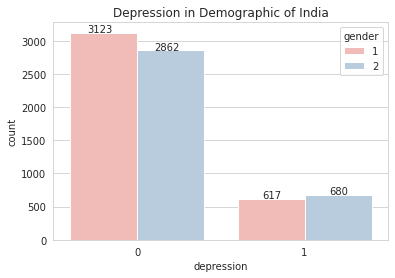

In [ ]:
#Calculating Depression among the demographic

depressed = df_drop[df_drop['depression'] == 1]
non_depressed = df_drop[df_drop['depression'] == 0]

sns.set_style('whitegrid')
ax = sns.countplot(x= 'depression', data=df_drop, hue = 'gender', palette='Pastel1')
ax.axes.text(-0.3,int(non_depressed[non_depressed['gender']==1]['id'].count())+4,str(int(non_depressed[non_depressed['gender']==1]['id'].count())))
ax.axes.text(0.1,int(non_depressed[non_depressed['gender']==2]['id'].count())+4,str(int(non_depressed[non_depressed['gender']==2]['id'].count())))

ax.axes.text(0.75,int(depressed[depressed['gender']==1]['id'].count())+4,str(int(depressed[depressed['gender']==1]['id'].count())))
ax.axes.text(1.15,int(depressed[depressed['gender']==2]['id'].count())+4,str(int(depressed[depressed['gender']==2]['id'].count())))
ax.set_title("Depression in Demographic of India")

**Corelation Matrix**

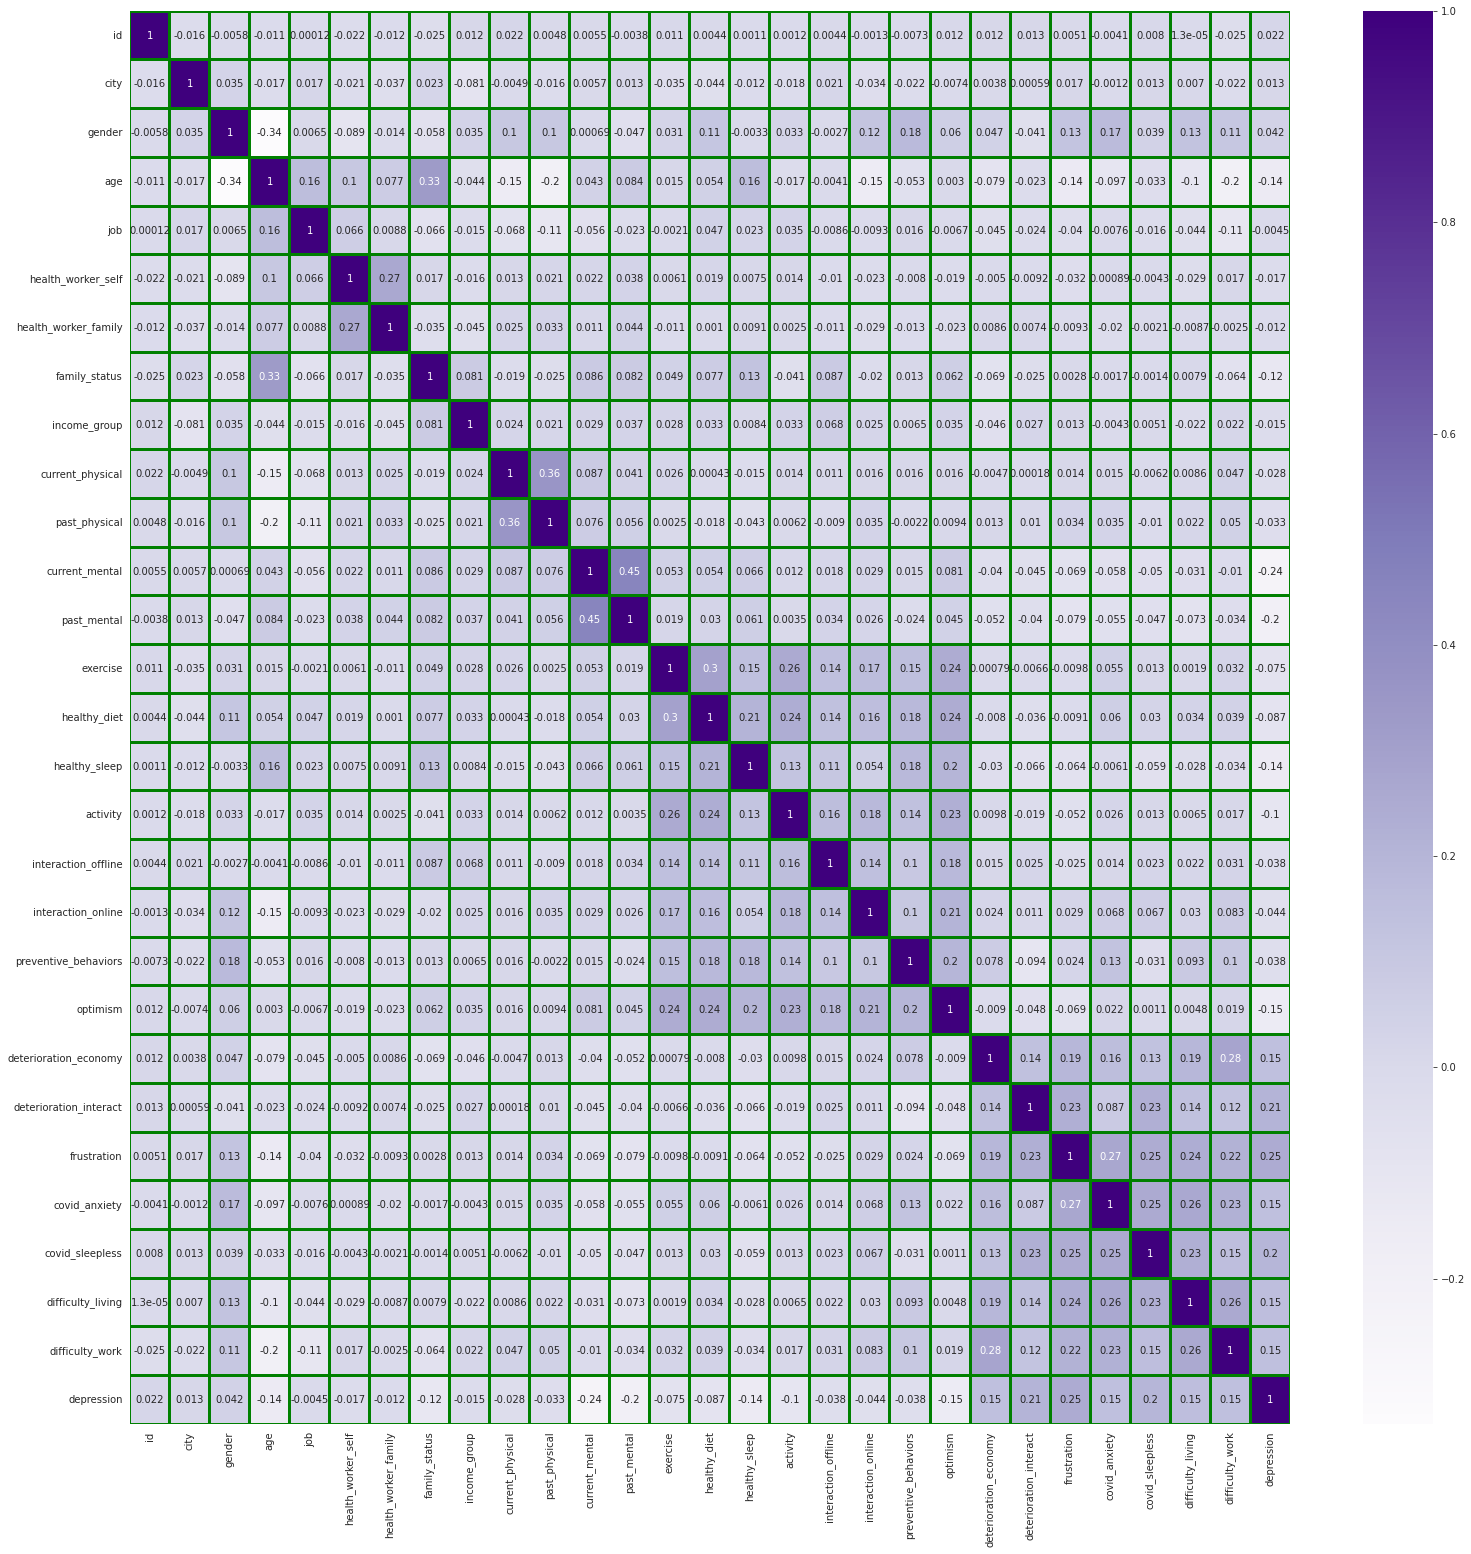

In [ ]:
plt.figure(figsize = (26,26)) 
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=2.0) #using heatmap
plt.show()

In [ ]:
healthy = df[(df['depression'] ==0) ].count()[1]
depressed = df[(df['depression'] ==1) ].count()[1]
print ("num of pepole without depression: "+ str(healthy))
print ("num of pepole with chance for depression: "+ str(depressed))

num of pepole without depression: 7056
num of pepole with chance for depression: 1554


In [ ]:
## Relationship between 2 categorical variables: chi-squared test
from scipy import stats
def chi_sq_test(DF, var1, var2):
    dataset_table = pd.crosstab(DF[var1], DF[var2])
    print('contingency table between {} and {} is:\n'.format(var1, var2))
    print(dataset_table)
    val = stats.chi2_contingency(dataset_table)
    Observed_Values = dataset_table.values 
    Expected_Values = val[-1]
    no_of_rows = dataset_table.shape[0]
    no_of_columns = dataset_table.shape[1]
    ddof = (no_of_rows-1)*(no_of_columns-1)
    print("\nDegree of Freedom:-",ddof)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = stats.chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value and p_value<=alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a relationship between 2 categorical variables".format(chi_square_statistic, p_value))
    elif chi_square_statistic>=critical_value and p_value>alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a weak relationship between 2 categorical variables, but not evident enough".format(chi_square_statistic, p_value))
    else:
        print("chi_square_statistic is {} and p-value is {}. So, these 2 variables are not related at all.".format(chi_square_statistic, p_value))
chi_sq_test(df, 'gender', 'depression')

contingency table between gender and depression is:

depression     0    1
gender               
1           3415  668
2           3641  886

Degree of Freedom:- 1
chi_square_statistic is 14.96401255926579 and p-value is 0.00010958122957660521. So, there is a relationship between 2 categorical variables


Text(6.0, 76, '75')

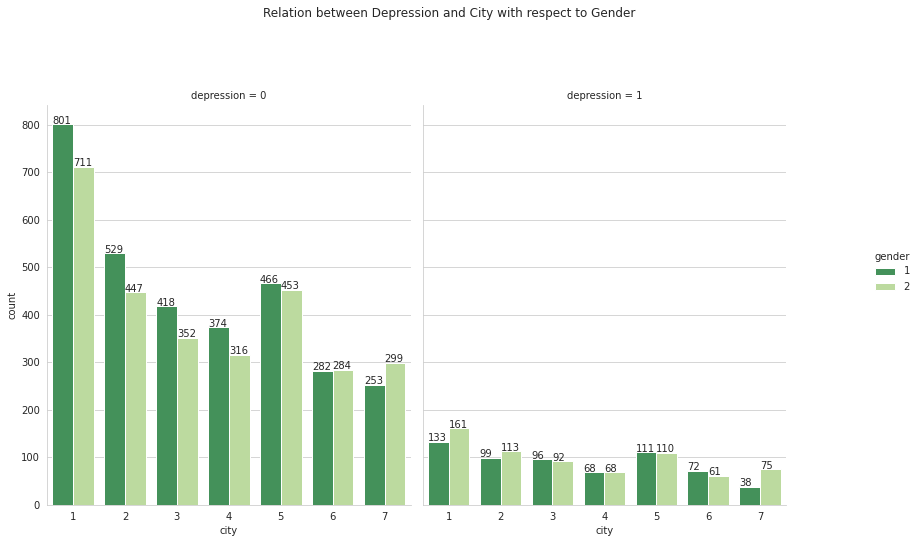

In [ ]:
#Depression analysis with respect to gender

sns.set_style("whitegrid")
g = sns.catplot(x="city", hue = 'gender', col = 'depression', data= df_drop, kind = 'count', palette="YlGn_r", col_wrap = 2)
g.fig.set_size_inches(13,8)
g.fig.subplots_adjust(top=0.81,right=0.86)
g.fig.suptitle('Relation between Depression and City with respect to Gender')

#No Depression
g.axes[0].text(-0.4,801+1,'801')
g.axes[0].text(0.0,711+1,'711')

g.axes[0].text(0.60,529+1,'529')
g.axes[0].text(1.0,447+1,'447')

g.axes[0].text(1.6,418+1,'418')
g.axes[0].text(2.0,352+1,'352')

g.axes[0].text(2.6,374+1,'374')
g.axes[0].text(3.0,316+1,'316')

g.axes[0].text(3.6,466+1,'466')
g.axes[0].text(4.0,453+1,'453')

g.axes[0].text(4.6,282+1,'282')
g.axes[0].text(5.0,284+1,'284')

g.axes[0].text(5.6,253+1,'253')
g.axes[0].text(6.0,299+1,'299')

#Depression
g.axes[1].text(-0.4,133+1,'133')
g.axes[1].text(0.0,161+1,'161')

g.axes[1].text(0.60,99+2,'99')
g.axes[1].text(1.0,113+1,'113')

g.axes[1].text(1.6,96+1,'96')
g.axes[1].text(2.0,92+1,'92')

g.axes[1].text(2.6,68+1,'68')
g.axes[1].text(3.0,68+1,'68')

g.axes[1].text(3.6,111+1,'111')
g.axes[1].text(4.0,110+1,'110')

g.axes[1].text(4.6,72+1,'72')
g.axes[1].text(5.0,61+1,'61')

g.axes[1].text(5.6,38+1,'38')
g.axes[1].text(6.0,75+1,'75')

In [ ]:
chi_sq_test(df, 'age', 'depression')

contingency table between age and depression is:

depression   0   1
age               
18          27   6
19          60  22
20          76  31
21          56  27
22          80  33
..          ..  ..
84           4   0
85           4   0
86           4   0
87           1   0
89           2   0

[71 rows x 2 columns]

Degree of Freedom:- 70
chi_square_statistic is 248.27519453168867 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [ ]:
#Age Group By Depression
df_age = df_drop[['age', 'depression']]

df_age_30 = df_age[df_age['age'].between(11, 30)]
df_age_50 = df_age[df_age['age'].between(31, 50)]
df_age_80 = df_age[df_age['age'].between(51, 80)]
df_age_100 = df_age[df_age['age'].between(81, 100)]

depression_by_age = {'11-30':[len(df_age_30[df_age_30['depression'] == 1]), len(df_age_30[df_age_30['depression'] == 0])],
                     '31-50':[len(df_age_50[df_age_50['depression'] == 1]), len(df_age_50[df_age_50['depression'] == 0])], 
                     '50-80':[len(df_age_80[df_age_80['depression'] == 1]), len(df_age_80[df_age_80['depression'] == 0])], 
                     '80-100':[len(df_age_100[df_age_100['depression'] == 1]), len(df_age_100[df_age_100['depression'] == 0])]}
depressed_age = [depression_by_age['11-30'][0], depression_by_age['31-50'][0], depression_by_age['50-80'][0], depression_by_age['80-100'][0]]
non_depressed_age = [depression_by_age['11-30'][1], depression_by_age['31-50'][1], depression_by_age['50-80'][1], depression_by_age['80-100'][1]]

df_age_depression = pd.DataFrame({'age_group':list(depression_by_age.keys()), 'depressed': depressed_age, 'non_depressed': non_depressed_age})
print(df_age_depression)

  age_group  depressed  non_depressed
0     11-30        280            887
1     31-50        638           2415
2     50-80        379           2654
3    80-100          0             29


Text(0.5, 1.0, 'Depression vs Optimism')

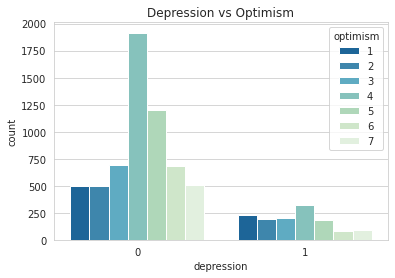

In [ ]:
ax = sns.countplot(x='depression',hue='optimism',data=df_drop,palette='GnBu_r')
ax.set_title("Depression vs Optimism")

In [ ]:
chi_sq_test(df, 'healthy_sleep', 'depression')

contingency table between healthy_sleep and depression is:

depression        0    1
healthy_sleep           
1               582  239
2               554  174
3               717  184
4              1138  320
5              1403  285
6              1363  190
7              1299  162

Degree of Freedom:- 6
chi_square_statistic is 188.09460535989444 and p-value is 0.0. So, there is a relationship between 2 categorical variables


Text(0.5, 1.0, 'Depression vs Healthy Sleep')

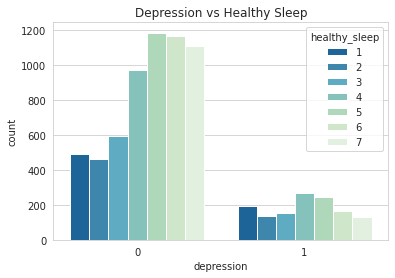

In [ ]:
ax = sns.countplot(x='depression',hue='healthy_sleep',data=df_drop,palette='GnBu_r')
ax.set_title("Depression vs Healthy Sleep")

In [ ]:
label = df_drop['depression']
#print(label)
feature_list = list(df_drop.columns)
feature_list.remove('id')
feature_list.remove('depression')
data = df_drop[feature_list]
#print(data)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5097, 27) (5097,)
(2185, 27) (2185,)


                  Features       Score
0                     city    0.349600
1                   gender    1.103652
2                      age  504.635019
3                      job    0.009049
4       health_worker_self    0.149769
5     health_worker_family    0.001040
6            family_status   14.950461
7             income_group    0.069117
8         current_physical    0.178154
9            past_physical    0.176793
10          current_mental    7.739366
11             past_mental    9.971598
12                exercise   29.663463
13            healthy_diet   28.004028
14           healthy_sleep   69.923771
15                activity   41.432689
16     interaction_offline    7.531608
17      interaction_online   16.746445
18    preventive_behaviors    6.130579
19                optimism   61.565755
20   deterioration_economy  117.078341
21  deterioration_interact  239.628698
22             frustration  329.532439
23           covid_anxiety   76.570771
24         covid_sleeples

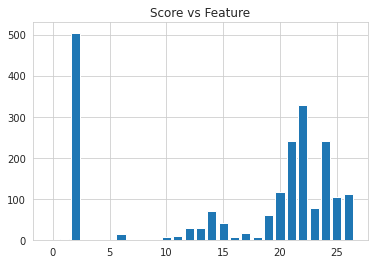

In [ ]:
#Calculating Feature Importance by Chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

features_weights_list = {f'Feature {i+1}': fs.scores_[i] for i in range(len(fs.scores_))}
feature_score = pd.DataFrame({'Features': feature_list, 'Score': list(features_weights_list.values())})
print(feature_score)
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Score vs Feature")
plt.show()

In [ ]:
# Splitting the dataset into training and test set.  
forest = RandomForestClassifierforest = RandomForestClassifier(n_estimators= 600, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 60, bootstrap = False)
forest.fit(X_train,y_train)
y_pred = forest.predict_proba(X_test)[:, 1]
#accuracy using roc
print("Without feature Selection")
print("AUC Score: %.3f" % roc_auc_score(y_test, y_pred))

Without feature Selection
AUC Score: 0.811


In [ ]:
#XGBoost

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict_proba(X_test)[:,1]
print("AUC:")
print(roc_auc_score(y_test, y_pred))

AUC:
0.8137338325391422


In [ ]:
df1=pd.read_csv('covid_mental_health_test.csv')

X = df[['gender', 'age', 'job', 'health_worker_self','health_worker_family',  'income_group','past_physical','current_physical',  'current_mental', 'past_mental',
      'exercise', 'healthy_diet', 'healthy_sleep', 'activity','interaction_offline', 'interaction_online', 'preventive_behaviors','optimism', 'deterioration_economy', 'deterioration_interact','frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living',
    'difficulty_work']]
#X=df[['difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental']]
y = df['depression']


#X=df[['deterioration_economy','deterioration_interact','frustration','covid_anxiety','covid_sleepless','difficulty_living','difficulty_work']]

In [ ]:
Id=df1['id']

test_X = df1[[ 'gender', 'age', 'job', 'health_worker_self','health_worker_family', 'income_group','past_physical',
   'current_physical', 'current_mental', 'past_mental','exercise', 'healthy_diet', 'healthy_sleep', 'activity',
'interaction_offline', 'interaction_online', 'preventive_behaviors','optimism', 'deterioration_economy', 'deterioration_interact',
'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living','difficulty_work']]

In [ ]:
import xgboost as xg
import xgboost as xgb
# Instantiation using regression
# 
xgb_r = xg.XGBClassifier(objective="binary:logistic", random_state=42,eval_metric="auc")
# Fitting the model 
xgb_r.fit(X, y) 
  
# Predict the model 
pred = xgb_r.predict_proba(test_X)
pred

array([[0.90138304, 0.09861698],
       [0.9332031 , 0.06679691],
       [0.89330786, 0.10669216],
       ...,
       [0.8988522 , 0.10114774],
       [0.89891165, 0.10108836],
       [0.832474  , 0.167526  ]], dtype=float32)

In [ ]:
print("Accuracy of train dataset:",xgb_r.score(X,y))

Accuracy of train dataset: 0.8571428571428571


In [ ]:
result1=pd.DataFrame({'id':df1['id'],'depression score':pred[:,1]})
result1

,id,depression score
0,828763412,0.098617
1,2009293273,0.066797
2,360753013,0.106692
3,321912830,0.102781
4,1090960107,0.514594
...,...,...
2718,1757603200,0.572079
2719,262849879,0.578109
2720,1521871763,0.101148
2721,2053555030,0.101088


In [ ]:
from sklearn import model_selection

#using logloss model
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
logloss_score = model_selection.cross_val_score(xgb_r, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (logloss_score.mean(), logloss_score.std()))

Logloss: 0.843 (0.008)


In [ ]:
test_df = df1
raw_train_df = df
# using isnull() function   
raw_train_df.isnull().any()
# drop all rows with any NaN and NaT values
#raw_train_df = raw_train_df.dropna()

#fill null values with the mean of the corresponding column
raw_train_df = raw_train_df.fillna(raw_train_df.mean())
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8610 non-null   int64  
 1   city                    8610 non-null   int64  
 2   gender                  8610 non-null   int64  
 3   age                     8610 non-null   int64  
 4   job                     8610 non-null   int64  
 5   health_worker_self      8610 non-null   int64  
 6   health_worker_family    8610 non-null   int64  
 7   family_status           8610 non-null   int64  
 8   income_group            8610 non-null   float64
 9   current_physical        8610 non-null   int64  
 10  past_physical           8610 non-null   int64  
 11  current_mental          8610 non-null   int64  
 12  past_mental             8610 non-null   int64  
 13  exercise                8610 non-null   int64  
 14  healthy_diet            8610 non-null   

In [ ]:
array = raw_train_df.values
X = array[:,1:28]

y = array[:,28]

In [ ]:
#After Discarding the features with low importance score
discard_feature = ['health_worker_family', 'job', 'income_group']
feature_list_updated =['city', 'gender', 'age', 'health_worker_self', 'family_status', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
data = df_drop[feature_list_updated]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(data, label, test_size=0.3, random_state=42)
print(X_train_fs.shape, y_train_fs.shape)
print(X_test_fs.shape, y_test_fs.shape)

(5097, 24) (5097,)
(2185, 24) (2185,)


In [ ]:
#Logistic Regression

log_model = LogisticRegression(max_iter=450)

log_model.fit(X_train,y_train)
y_pred=log_model.predict_proba(X_test)[:,1]
print("Without feature Selection")
print("AUC: %.6f" % roc_auc_score(y_test, y_pred))


Without feature Selection
AUC: 0.819089


In [ ]:
df_test = pd.read_csv("covid_mental_health_test.csv")
df_test = df_test.fillna(0)
df_test_id = df_test['id']

print("Without Feature Selection")
x_test = df_test[feature_list]
y_test_pred = log_model.predict_proba(x_test)[:,1]
print(y_test_pred)

print("With Feature Selection")
x_test_fs = df_test[feature_list_updated]
print(x_test_fs)
#y_test_pred_fs = log_model.predict_proba(x_test_fs)[:,1]
#print(y_test_pred_fs)

Without Feature Selection
[0.08670949 0.05237541 0.07511307 ... 0.12493114 0.06667462 0.22331114]
With Feature Selection
      city  gender  age  health_worker_self  family_status  current_physical  \
0        3       2   45                   2              2                 2   
1        2       2   32                   2              2                 2   
2        1       2   34                   2              1                 2   
3        3       1   49                   2              2                 2   
4        7       1   42                   2              1                 2   
...    ...     ...  ...                 ...            ...               ...   
2718     4       2   31                   2              1                 2   
2719     2       2   44                   2              2                 2   
2720     5       2   52                   2              2                 2   
2721     7       1   65                   2              2                 2   

In [ ]:
data1 = {
        
        'gender' : 2,
        'age' : 28,
        'job' :4,
        'health_worker_self' : 2,
        'health_worker_family': 2 ,
        'income_group':1,
        
        
        
        'past_physical': 1,
         'current_physical': 1,
        'current_mental': 1,
        'past_mental': 1,
        'exercise': 1,
        'healthy_diet': 4,
        'healthy_sleep': 1,
        'activity': 4,
        'interaction_offline': 4,
        'interaction_online': 6,
        'preventive_behaviors': 7,
        'optimism': 4,
        'deterioration_economy': 5,
        'deterioration_interact': 4,
        'frustration': 4,
        'covid_anxiety': 4,
        'covid_sleepless': 4,
        'difficulty_living': 4,
        'difficulty_work': 4
        
         
         
         
         }

df = pd.DataFrame(data1,index=[0])
df
new_pred = xgb_r.predict(df)
print("Is he depressed : ",new_pred[0])

Is he depressed :  1


In [ ]:
xg = XGBClassifier()
xg.fit(X,y)

XGBClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(xg,'model_joblib_xg')

['model_joblib_xg']

In [ ]:
model=joblib.load('model_joblib_xg')

In [ ]:
model.predict(df)

ValueError: ignored